# LAB - WEEK 3, DAY2 

### 1) check if there are highly correlated features and drop them if there are any.


In [1]:
import pandas as pd 
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [3]:
df.head(5)

,Unnamed: 0,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


<AxesSubplot:>

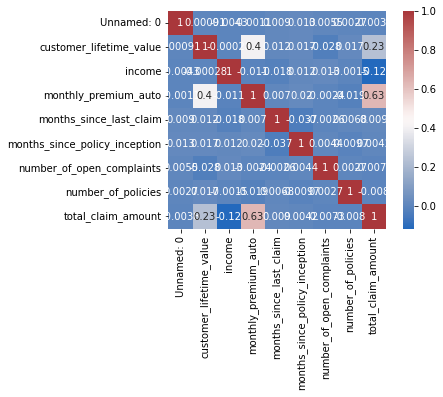

In [4]:
#fig = plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='vlag', square=True, annot=True)

## 2) One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 4. ( Hint: check Dropfirst option).


In [5]:
df = df.drop(['effective_to_date'],axis=1)
df.head(2)

,Unnamed: 0,region,customer_lifetime_value,response,coverage,education,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,jan,unemployed,f,26794,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize


In [6]:
df = pd.get_dummies(df, prefix_sep='_', drop_first=True)
df.head(3)

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,4809,48029,61,7,52,0,9,292,0,...,0,0,0,0,0,0,0,0,1,0
1,1,2228,26794,64,3,26,0,1,744,0,...,0,1,0,0,0,0,0,0,1,0
2,2,14947,22139,100,34,31,0,2,480,1,...,0,1,0,0,0,0,1,0,1,0


## 3) for the first iteration, we will focus on the numericals data (numericals data frame) as our data source. 

In [7]:
## only numerical 
df_num = df.iloc[:,1:].select_dtypes(np.number)

In [8]:
len(df_num.index)

10689

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa04c0b5610>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa04c0b5c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa04c0b5340>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa04c0c7190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa04c0c7460>],
 'means': []}

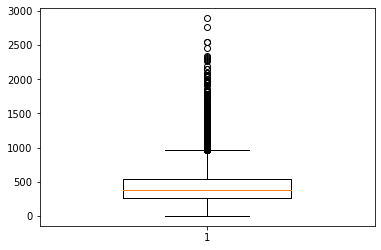

In [9]:
## check if there are outliers 
plt.boxplot(df_num['total_claim_amount'], widths=.5)

Text(0.5, 1.0, 'hist')

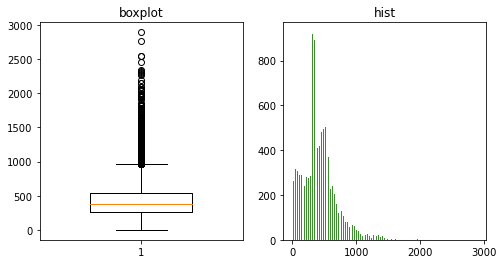

In [10]:
fig, ax = plt.subplots(4,2, figsize = (8,4))
plt.subplot(1,2,1)
plt.boxplot(df_num['total_claim_amount'], widths=.5)
plt.title('boxplot')
plt.subplot(1,2,2)
plt.hist(df_num['total_claim_amount'], color = '#398f29', edgecolor = 'white', bins = 100)
plt.title('hist')

In [11]:
## define a function to find outliers
def removeOutliers(df, col, limit):
    p1 = limit
    p2 = 1-limit
    outliers = col.between(col.quantile(p1), col.quantile(p2))
    df = df.loc[outliers]
    return df
len(df_num.index)

10689

In [12]:
try1 = removeOutliers(df_num, df_num['total_claim_amount'], 0.05)
len(df_num.index)

10689

In [13]:
## define a function to find outliers
def removeHighOutliers(df, col, limit):
    p1 = 1-limit
    outliers = col.between(0, col.quantile(p1))
    df = df.loc[outliers]
    return df
len(df_num.index)

10689

In [14]:
try2 = removeHighOutliers(df_num, df_num['total_claim_amount'], 0.05)
len(try2.index)

10154

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa0184f7ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa039058280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa0184f79d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa039058820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa039058af0>],
 'means': []}

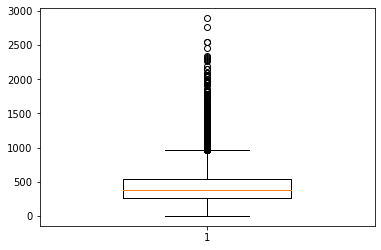

In [15]:
plt.boxplot(df_num['total_claim_amount'], widths=.5)

### 3b) (optional) remove the outliers from the numerical columns.

In [16]:
lenght_pre = len(df_num.index)

In [17]:
## define a function to find outliers 
def findOutiliers(col):
    ''' Split the column in 3 categories: within 45% around the mean, 5% extremes 
    above and below''' 
    percentiles = col.describe([.05,.95])
    col = ['low_outliers' if x<percentiles['5%'] 
           else 'normal' if (x>=percentiles['5%'] and x<percentiles['95%'])
           else 'high_outliers' for x in col]
    return col

In [18]:
df_num['outliers'] = findOutiliers(df_num['total_claim_amount'])
df_num['outliers'].unique()

array(['normal', 'low_outliers', 'high_outliers'], dtype=object)

In [19]:
## subset the df to drop outliers 
df_num = df_num.where((df_num['outliers']!="high_outliers") & (df_num['outliers']!="low_outliers"))
df_num = df_num.dropna(subset=['outliers'])

(array([ 92., 100.,  98.,  91.,  87.,  89., 111.,  86., 100.,  97.,  84.,
         95.,  93.,  84.,  74.,  58., 111.,  75.,  91.,  88.,  93.,  96.,
         82.,  78.,  89.,  98., 312., 275., 345., 173., 311., 259., 334.,
        171., 139., 145., 114., 152.,  93., 131., 164., 117., 152., 166.,
        155., 149., 141., 198., 179., 156., 126., 169., 139., 141., 125.,
        126., 159.,  52.,  70.,  53.,  96.,  75.,  75.,  79.,  72.,  56.,
         80.,  64.,  47.,  45.,  40.,  37.,  36.,  42.,  36.,  42.,  37.,
         50.,  42.,  29.,  49.,  26.,  37.,  15.,  42.,  26.,  30.,  32.,
         19.,  23.,  21.,  17.,  23.,  23.,  16.,  27.,  21.,  20.,  25.,
         21.]),
 array([ 51.  ,  60.15,  69.3 ,  78.45,  87.6 ,  96.75, 105.9 , 115.05,
        124.2 , 133.35, 142.5 , 151.65, 160.8 , 169.95, 179.1 , 188.25,
        197.4 , 206.55, 215.7 , 224.85, 234.  , 243.15, 252.3 , 261.45,
        270.6 , 279.75, 288.9 , 298.05, 307.2 , 316.35, 325.5 , 334.65,
        343.8 , 352.95, 362.1 

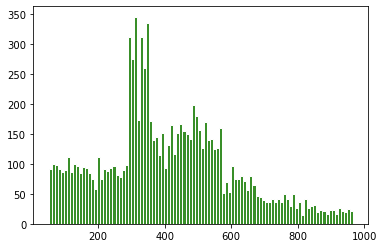

In [20]:
plt.hist(df_num['total_claim_amount'], color = '#398f29', edgecolor = 'white', bins = 100)

In [21]:
df['total_claim_amount'].sort_values(ascending=False)

4434    2893
7734    2759
9614    2552
8007    2552
1316    2452
        ... 
6865       0
3628       0
2759       0
5853       0
6113       0
Name: total_claim_amount, Length: 10689, dtype: int64

### CHECK OUTLIERS

In [22]:
## reload the df
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")
df_num = df.iloc[:,1:].select_dtypes(np.number)

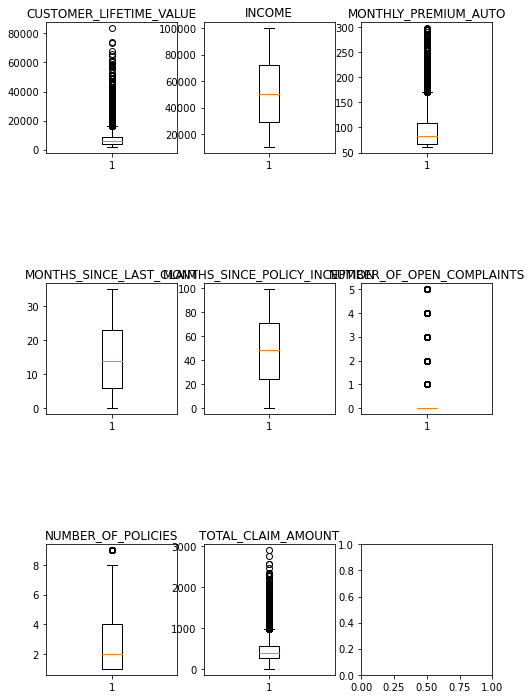

In [23]:
fig, ax = plt.subplots(3,3, figsize = (8,12))

for i in range(1,9):
    plt.subplot(3,3,i)
    plt.boxplot(df_num.iloc[:,i-1])
    plt.title(f'{df_num.columns[i-1].upper()}')
fig.subplots_adjust(hspace=1)

### 3b) X-y split (y is the target variable which is the total claim amount)


In [24]:
x = df_num.drop('total_claim_amount', axis=1)
y = df_num.total_claim_amount

In [25]:
to_clean = df_num[["total_claim_amount", "customer_lifetime_value", "monthly_premium_auto"]]

In [26]:
to_clean

,total_claim_amount,customer_lifetime_value,monthly_premium_auto
0,292,4809,61
1,744,2228,64
2,480,14947,100
3,484,22332,97
4,707,9025,117
...,...,...,...
10684,1214,15563,253
10685,273,5259,65
10686,381,23893,201
10687,618,11971,158


In [27]:
df_num = removeHighOutliers(df_num, df_num["total_claim_amount"], 0.05)
df_num = removeHighOutliers(df_num, df_num["customer_lifetime_value"], 0.05)
df_num = removeHighOutliers(df_num, df_num["monthly_premium_auto"], 0.05)
df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
4,9025,23675,117,15,31,1,7,707
5,4745,50549,61,2,73,0,7,292
...,...,...,...,...,...,...,...,...
10678,8610,12791,111,27,36,0,9,532
10680,4547,33531,116,11,15,0,1,801
10681,3579,28304,91,10,30,2,1,655
10682,2771,59855,74,30,82,4,1,355
